### Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from scipy.stats import zscore
from sklearn.cluster import KMeans, DBSCAN
from DBSCANPP import DBSCANPP
from sklearn.metrics.pairwise import euclidean_distances, cosine_similarity

## Question 1

In [2]:
tracks = pd.read_csv('./dataset.csv')
tracks.shape, tracks.columns

((114000, 21),
 Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
        'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
        'key', 'loudness', 'mode', 'speechiness', 'acousticness',
        'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
        'track_genre'],
       dtype='object'))

In [3]:
tracks.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [4]:
cat_values = tracks[['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name']]
cat_values.head()

,Unnamed: 0,track_id,artists,album_name,track_name
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On


In [5]:
tracks = tracks.drop(columns=['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name'])
tracks.shape

(114000, 16)

In [6]:
tracks['track_genre'].unique()

array(['acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient',
       'anime', 'black-metal', 'bluegrass', 'blues', 'brazil',
       'breakbeat', 'british', 'cantopop', 'chicago-house', 'children',
       'chill', 'classical', 'club', 'comedy', 'country', 'dance',
       'dancehall', 'death-metal', 'deep-house', 'detroit-techno',
       'disco', 'disney', 'drum-and-bass', 'dub', 'dubstep', 'edm',
       'electro', 'electronic', 'emo', 'folk', 'forro', 'french', 'funk',
       'garage', 'german', 'gospel', 'goth', 'grindcore', 'groove',
       'grunge', 'guitar', 'happy', 'hard-rock', 'hardcore', 'hardstyle',
       'heavy-metal', 'hip-hop', 'honky-tonk', 'house', 'idm', 'indian',
       'indie-pop', 'indie', 'industrial', 'iranian', 'j-dance', 'j-idol',
       'j-pop', 'j-rock', 'jazz', 'k-pop', 'kids', 'latin', 'latino',
       'malay', 'mandopop', 'metal', 'metalcore', 'minimal-techno', 'mpb',
       'new-age', 'opera', 'pagode', 'party', 'piano', 'pop-film', 'pop',
       'pow

In [7]:
genres = tracks['track_genre'].to_numpy().reshape(-1,1)
genres

array([['acoustic'],
       ['acoustic'],
       ['acoustic'],
       ...,
       ['world-music'],
       ['world-music'],
       ['world-music']], dtype=object)

In [8]:
encoder = OneHotEncoder(sparse_output=False)
mapped_values = encoder.fit_transform(tracks[['track_genre']])

In [9]:
df = pd.DataFrame(mapped_values,
                  columns=encoder.get_feature_names_out(['track_genre']))

final_tracks = pd.concat([tracks.drop(['track_genre'], axis=1), df], axis=1)

In [10]:
final_tracks.head()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,...,track_genre_spanish,track_genre_study,track_genre_swedish,track_genre_synth-pop,track_genre_tango,track_genre_techno,track_genre_trance,track_genre_trip-hop,track_genre_turkish,track_genre_world-music
0,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Question 2

In [11]:
normalized_tracks = zscore(final_tracks.astype(float).to_numpy())
normalized_tracks[0]

array([ 1.78262719,  0.02457516, -0.30576742,  0.62924424, -0.71714792,
       -1.21044237,  0.30082834, -1.32628099,  0.55184753, -0.85020151,
       -0.50410861,  0.75874327,  0.92930586, -1.14186279,  0.22182318,
       10.63014581, -0.09407209, -0.09407209, -0.09407209, -0.09407209,
       -0.09407209, -0.09407209, -0.09407209, -0.09407209, -0.09407209,
       -0.09407209, -0.09407209, -0.09407209, -0.09407209, -0.09407209,
       -0.09407209, -0.09407209, -0.09407209, -0.09407209, -0.09407209,
       -0.09407209, -0.09407209, -0.09407209, -0.09407209, -0.09407209,
       -0.09407209, -0.09407209, -0.09407209, -0.09407209, -0.09407209,
       -0.09407209, -0.09407209, -0.09407209, -0.09407209, -0.09407209,
       -0.09407209, -0.09407209, -0.09407209, -0.09407209, -0.09407209,
       -0.09407209, -0.09407209, -0.09407209, -0.09407209, -0.09407209,
       -0.09407209, -0.09407209, -0.09407209, -0.09407209, -0.09407209,
       -0.09407209, -0.09407209, -0.09407209, -0.09407209, -0.09

## Question 3

Επειδή για ***k=[2,3,5,7,10,15,20]*** δεν επιβεβαιώνονταν η μέθοδος Elbow, πρόσθεσα κάποια έξτρα k μέχρι να παρουσιαστεί το φαινόμενο. 

SSE for 2 clusters: 14423469.601222536
SSE for 3 clusters: 14280326.818864755
SSE for 5 clusters: 14021875.780271597
SSE for 7 clusters: 13776524.8040354
SSE for 10 clusters: 13370978.958982391
SSE for 15 clusters: 12773647.167601619
SSE for 20 clusters: 12197400.352057466
SSE for 35 clusters: 10443494.16686636
SSE for 50 clusters: 8699275.23278926
SSE for 65 clusters: 6958838.965482334
SSE for 80 clusters: 5226722.9612051565
SSE for 95 clusters: 3471576.7545380928
SSE for 110 clusters: 1722097.9779427974
SSE for 125 clusters: 1206694.5229878686
SSE for 140 clusters: 1166706.4236599898
SSE for 160 clusters: 1113776.5569896444


Text(0.5, 1.0, 'Elbow Method for KMeans')

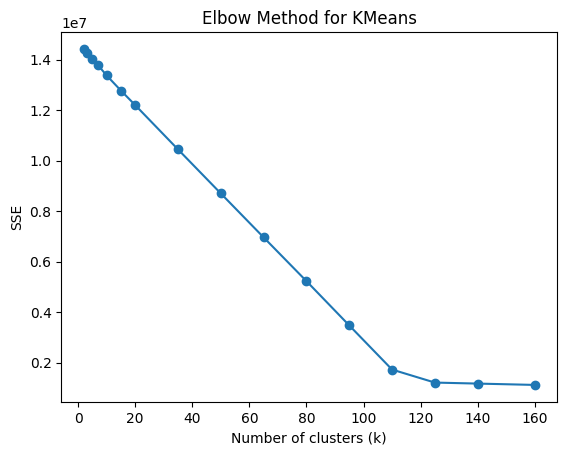

In [12]:
seed = 42

clusters = [2,3,5,7,10,15,20,35,50,65,80,95,110,125,140,160]
sse = []
for k in clusters:
	model = KMeans(n_clusters=k, random_state=seed)
	model.fit(normalized_tracks)

	sse.append(model.inertia_)
	print(f'SSE for {k} clusters: {model.inertia_}')


plt.plot(clusters, sse,  marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("SSE")
plt.title("Elbow Method for KMeans")

## Question 5

Σύμφωνα με την μέθοδο Elbow, ο καλύτερος αριθμός clusters(k) για τα δεδομένα μας είναι το k=125.

In [13]:
model = KMeans(n_clusters=125, random_state=42)
labels = model.fit_predict(normalized_tracks)

In [14]:
labels, model.labels_

(array([22, 22, 22, ..., 74, 74, 74]), array([22, 22, 22, ..., 74, 74, 74]))

## Question 6

In [15]:
print(f"{cat_values[['track_name','artists']].iloc[2009]} \nCluster: {labels[2009]}")

track_name    Smells Like Teen Spirit
artists                       Nirvana
Name: 2009, dtype: object 
Cluster: 2


In [16]:
mask = (labels == labels[2009])
mask

array([False, False, False, ..., False, False, False])

In [17]:
tracks[mask]

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
2000,87,260173,False,0.588,0.521,10,-9.461,1,0.0329,0.067800,0.149000,0.1230,0.337,85.012,4,alt-rock
2001,83,299960,False,0.705,0.712,6,-6.156,1,0.0385,0.010200,0.000855,0.1000,0.620,97.512,4,alt-rock
2002,86,206280,False,0.575,0.568,9,-5.509,0,0.0300,0.048400,0.000417,0.2860,0.370,93.986,4,alt-rock
2003,93,240400,False,0.612,0.807,10,-2.810,1,0.0336,0.049500,0.017700,0.1010,0.398,124.053,4,alt-rock
2004,83,153000,False,0.551,0.881,7,-6.099,0,0.0542,0.186000,0.079100,0.1520,0.387,88.036,4,alt-rock
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,44,279413,False,0.490,0.747,0,-4.628,1,0.0448,0.075900,0.000234,0.1080,0.785,96.010,4,alt-rock
2996,44,235058,False,0.628,0.869,6,-5.821,0,0.0426,0.125000,0.000001,0.0235,0.868,166.983,4,alt-rock
2997,0,212253,False,0.435,0.874,0,-6.664,1,0.1230,0.000337,0.041900,0.3110,0.265,120.167,4,alt-rock
2998,44,294733,False,0.557,0.896,4,-6.520,0,0.0346,0.000931,0.000186,0.3390,0.561,101.073,4,alt-rock


In [18]:
normalized_tracks[mask].shape

(1000, 129)

#### Calculate distances between all points in the cluster (81)

In [19]:
distances = euclidean_distances(normalized_tracks[mask])
distances.shape

(1000, 1000)

#### Distances of my track

In [20]:
favsong_distances = distances[10]
favsong_distances

array([4.05748905, 3.46239448, 3.15513405, 3.08419858, 2.83409782,
       3.79388039, 5.38671982, 2.75517316, 3.4339354 , 3.405237  ,
       0.        , 3.34001352, 1.89172212, 4.19184089, 4.26032984,
       4.79965132, 4.42270714, 4.41094203, 6.55579515, 5.0658894 ,
       3.85476201, 4.41094203, 4.79965132, 4.8862367 , 4.32959244,
       5.00762569, 4.86123577, 4.7461891 , 4.23581997, 4.83033363,
       3.61198243, 5.69661657, 5.46795666, 5.46795666, 3.73265838,
       5.09536315, 5.06194469, 4.41576181, 4.41576181, 4.41576181,
       4.98861278, 5.06194469, 5.09536315, 6.06318385, 4.41576181,
       4.84302284, 4.41576181, 4.79219806, 5.0290253 , 4.41576181,
       4.05757176, 2.54683331, 5.40149973, 5.61983527, 4.34616846,
       4.96380055, 3.98162518, 3.50831966, 1.74138674, 6.12740482,
       3.93479743, 4.96025801, 4.38595524, 4.62087333, 4.66673779,
       4.63497265, 4.69871597, 4.7461891 , 4.34282378, 4.27377562,
       6.52986334, 4.07431699, 4.65371945, 4.98861278, 4.51779

In [21]:
recommended_songs = sorted(range(len(favsong_distances)), key=lambda i: favsong_distances[i])[1:]
recommended_songs[:3]

[761, 258, 712]

In [ ]:
print(f"Top-3 recommdended songs\n{'-'*30}")
print(f"{cat_values[['track_name','artists']].iloc[1999+recommended_songs[0]]} \nCluster: {labels[1999+recommended_songs[0]]}")
print('-'*30)
print(f"{cat_values[['track_name','artists']].iloc[1999+recommended_songs[1]]} \nCluster: {labels[1999+recommended_songs[1]]}")
print('-'*30)
print(f"{cat_values[['track_name','artists']].iloc[1999+recommended_songs[2]]} \nCluster: {labels[1999+recommended_songs[2]]}")

Top-3 recommdended songs
------------------------------
track_name                                Choke
artists       I DONT KNOW HOW BUT THEY FOUND ME
Name: 2760, dtype: object 
Cluster: 2
------------------------------
track_name       Hero
artists       Skillet
Name: 2257, dtype: object 
Cluster: 2
------------------------------
track_name          Human
artists       The Killers
Name: 2711, dtype: object 
Cluster: 2


Πέρα από το δέυτερο προτεινόμενο τραγούδι, δεν θα έλεγα ότι τα πήγε και καλά.

## Question 7

In [23]:
cos_distances = cosine_similarity(normalized_tracks[mask])
cos_distances.shape

(1000, 1000)

In [24]:
favsong_distances2 = cos_distances[10]
favsong_distances2

array([0.93428418, 0.95181596, 0.96024258, 0.96225607, 0.96781406,
       0.94247983, 0.88573919, 0.96972182, 0.95304904, 0.95380385,
       1.        , 0.95527485, 0.98558821, 0.92925826, 0.92699237,
       0.907856  , 0.92145612, 0.92228677, 0.83447311, 0.89601471,
       0.94030354, 0.92228677, 0.907856  , 0.90443865, 0.92467176,
       0.89830507, 0.90557436, 0.90921157, 0.92814836, 0.90672175,
       0.9480549 , 0.87832283, 0.88613455, 0.88613455, 0.94392692,
       0.89484949, 0.89661246, 0.92074436, 0.92074436, 0.92074436,
       0.89895822, 0.89661246, 0.89484949, 0.85696409, 0.92074436,
       0.90499755, 0.92074436, 0.90746157, 0.89896547, 0.92074436,
       0.93373351, 0.97399555, 0.8877586 , 0.88002433, 0.92471811,
       0.9033596 , 0.93622674, 0.95072865, 0.98789703, 0.85438688,
       0.93771518, 0.90046038, 0.92213723, 0.91378684, 0.91146247,
       0.9126295 , 0.91028177, 0.90921157, 0.92389122, 0.92622641,
       0.837116  , 0.93267671, 0.9131085 , 0.89895822, 0.91752

In [25]:
recommended_songs2 = sorted(range(len(favsong_distances2)), key=lambda i: favsong_distances2[i], reverse=True)[1:]
recommended_songs2[:3]

[761, 258, 712]

In [26]:
print(f"Top-3 recommdended songs\n{'-'*30}")
print(f"{cat_values[['track_name','artists']].iloc[1999+recommended_songs2[0]]} \nCluster: {labels[1999+recommended_songs2[0]]}")
print('-'*30)
print(f"{cat_values[['track_name','artists']].iloc[1999+recommended_songs2[1]]} \nCluster: {labels[1999+recommended_songs2[1]]}")
print('-'*30)
print(f"{cat_values[['track_name','artists']].iloc[1999+recommended_songs2[2]]} \nCluster: {labels[1999+recommended_songs2[2]]}")

Top-3 recommdended songs
------------------------------
track_name                                Choke
artists       I DONT KNOW HOW BUT THEY FOUND ME
Name: 2760, dtype: object 
Cluster: 2
------------------------------
track_name       Hero
artists       Skillet
Name: 2257, dtype: object 
Cluster: 2
------------------------------
track_name          Human
artists       The Killers
Name: 2711, dtype: object 
Cluster: 2


Τα προτεινόμενα τραγούδια ήταν ίδια και με τη χρήση των Cosine Similarity και Cosine Distances.

## Question 9

In [27]:
model = DBSCAN(eps=0.5, metric='euclidean', min_samples=10)
clusters = model.fit(normalized_tracks)

In [28]:
model.labels_

array([-1, -1, -1, ..., -1, -1, -1], dtype=int64)

In [29]:
n_clusters = len(set(model.labels_))
n_clusters

175

- Elbow Method for KMeans: 125 clusters
- DBSCAN: 175 clusters

In [30]:
model.labels_[2009]

-1

Βλέπουμε ότι το τραγούδι που διάλεξα για τα προηγούμενα ερωτήματα, ο DBSCAN το θεώρεισε θόρυβο.

## Question 10

In [35]:
model = DBSCANPP(p=0.1, eps_density=5.0, eps_clustering=5.0, minPts=10)
labels = model.fit_predict(normalized_tracks)

In [36]:
n_clusters = len(set(labels))
n_clusters

140

In [37]:
print(f"{cat_values[['track_name','artists']].iloc[2009]} \nCluster: {labels[2009]}")

track_name    Smells Like Teen Spirit
artists                       Nirvana
Name: 2009, dtype: object 
Cluster: 65


In [38]:
mask = (labels == labels[2009])
distances = euclidean_distances(normalized_tracks[mask])
distances.shape

(1000, 1000)

In [39]:
favsong_distances = distances[10]

In [40]:
recommended_songs = sorted(range(len(favsong_distances)), key=lambda i: favsong_distances[i])[1:]
recommended_songs[:3]

[761, 258, 712]

In [41]:
print(f"Top-3 recommdended songs\n{'-'*30}")
print(f"{cat_values[['track_name','artists']].iloc[1999+recommended_songs[0]]} \nCluster: {labels[1999+recommended_songs[0]]}")
print('-'*30)
print(f"{cat_values[['track_name','artists']].iloc[1999+recommended_songs[1]]} \nCluster: {labels[1999+recommended_songs[1]]}")
print('-'*30)
print(f"{cat_values[['track_name','artists']].iloc[1999+recommended_songs[2]]} \nCluster: {labels[1999+recommended_songs[2]]}")

Top-3 recommdended songs
------------------------------
track_name                                Choke
artists       I DONT KNOW HOW BUT THEY FOUND ME
Name: 2760, dtype: object 
Cluster: 65
------------------------------
track_name       Hero
artists       Skillet
Name: 2257, dtype: object 
Cluster: 65
------------------------------
track_name          Human
artists       The Killers
Name: 2711, dtype: object 
Cluster: 65


Και με τη χρήση του DBSCAN++ προτάθηκαν τα ίδια τραγούδια.